In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Example 9.2

SAE 1008 강으로 제작된 hot-rolled 기기가 랜덤 하중에 노출된다. 주요 위치에서의 응력 응답은 Figure 9.12의 PSD로 계산된다. PSD는 1 Hz에서 10,000 $MPa^2/Hz$, 10 Hz에서 2,500 $MPa^2/Hz$의 크기를 갖는다. 재료의 S-N 커브는 다음과 같은 관계를 갖는다.


$$S_{a,i} = S_f^{'} (2N_{f,i})^b $$

여기서

$S_f^{'}$ = 1,297 MPa, 피로강도계수

$b$ = -0.18, 피로강도지수

앞서 소개된 광대역 응력에 대한 식을 사용하여 이 기기의 피로 손상을 계산한다. 정현파의 crest factor는 $\sqrt{2}=1.414$임을 참고.

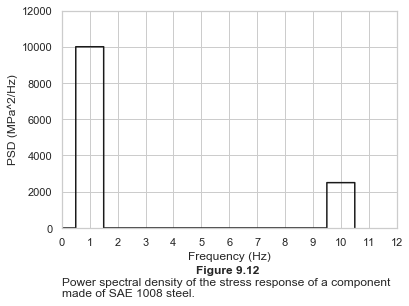

In [46]:
A1 = 10000; A2 = 2500;
freq = np.array([0,0.5-0.001,0.5,1,1.5,1.5+0.001,9.5-0.001,9.5,10,10.5,10.5+0.001]);
psd = np.array([0,0,A1,A1,A1,0,0,A2,A2,A2,0]);
plt.plot(freq,psd,'k-'); plt.xlim(0,12); plt.ylim(0,12000); plt.xticks(np.linspace(0,12,13)); plt.grid('which=both');
plt.xlabel('Frequency (Hz)'); plt.ylabel('PSD (MPa^2/Hz)');
plt.text(4.8,-2500,'Figure 9.12',fontsize=12,weight='bold');
plt.text(0,-3800,'Power spectral density of the stress response of a component\nmade of SAE 1008 steel.',fontsize=12);

### Solution

시간이력에서의 피로손상을 먼저 계산할 것이다. 그리고 이를 PSD 기반의 손상 예측 결과와 비교를 위한 기준으로 삼을 것이다.

기존 응력 시간이력은 2개의 정현파를 더하면 얻을 수 있다. 정현파 각각의 크기는 RMS 값에 1.414를 곱하면 얻을 수 있다. RMS 값은 각 PSD block의 넓이의 1/2 승이다.

1 Hz에서 정현파의 응력 크기 $S_{a@1Hz}$는 다음과 같다.

$$S_{a@1Hz}=\sqrt{10,000\times1}\times 1.414 = 141.4 MPa.$$


10 Hz에서 정현파의 응력 크기 $S_{a@10Hz}$는 다음과 같다.

$$S_{a@10Hz}=\sqrt{2,500\times1}\times 1.414 = 70.7 MPa.$$


중첩된 정현파에 rainflow cycle-counting을 적용하면, 평균응력의 영향을 배제하면, 1 Hz에서의 응력 크기는 212.2 MPa (=141.4 + 70.7 MPa)가 되며, 10 Hz에서의 응력 크기는 70.7 MPa가 된다.

진동피로에 대한 재료의 S-N 커브는 보통 다음과 같은 S-N 표현을 따른다.

$$N_{f,i}S_{a,i}^m=C$$

따라서,

$$m=-1/b=-1/(-0.18)=5.56$$

$$C=0.5\times(S_f^{'})^m=0.5 \times 1297^{5.56}=1.02\times 10^{17} MPa$$

앞서 기술된 S-N 식을 사용하면 각 정현파에 대한 피로수명을 다음과 같이 계산할 수 있다.

$$N_{f,1} = C\cdot S_{a,1}^{-m} = 1.02\times 10^{17}\times 212.1^{-5.56} = 1.18 \times 10^4 cycles$$

$$N_{f,2} = C\cdot S_{a,2}^{-m} = 1.02\times 10^{17}\times 70.7^{-5.56} = 5.32 \times 10^6 cycles$$

1초동안 1Hz와 10Hz에서의 정현파는 각각 1 cycle ($n_1=1$), 10 cycle ($n_2=10$)의 반복하중을 보인다. 1초동안의 선형피로누적은 다음과 같다.